# 机器学习练习 1 - 单变量线性回归

In [158]:
import math, copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 数据进行处理
- 使用panda 从当前目录下读取文件
- 并为其设置列名称Population 和 Profit

In [159]:
path =  './single_variable_linear_regression.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

- 查看文件头,默认展示前5行

In [160]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


- 查看数据详情格式

In [161]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


- 绘制数据

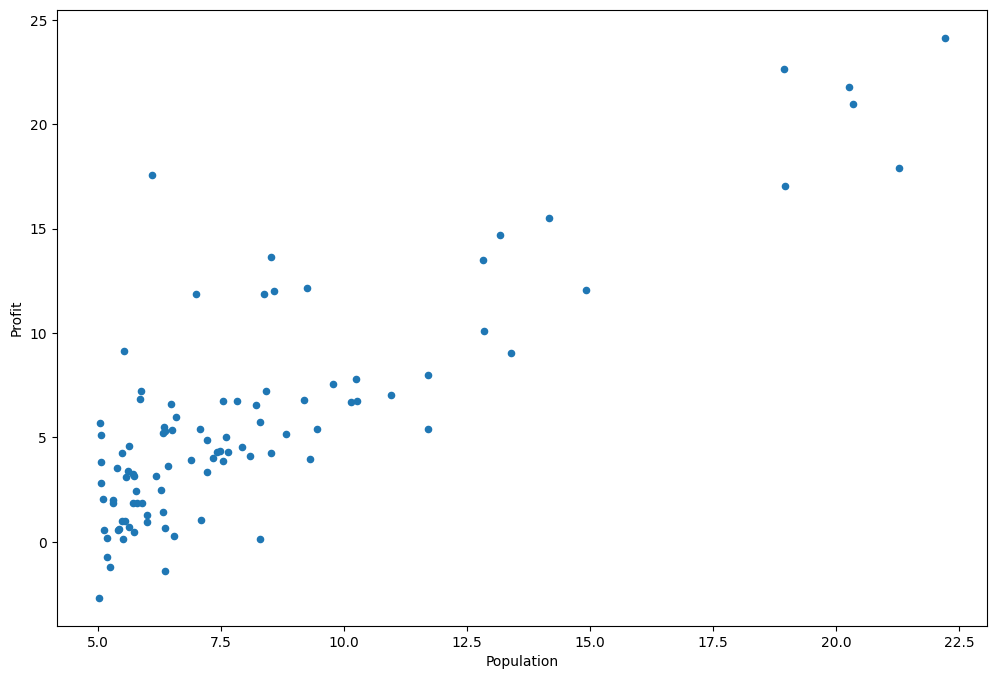

In [162]:
# kind='scatter' 表示显示散列
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))
# 显示数据
plt.show()

## 线性回归

<a name="toc_40291_2.1"></a>
## Gradient descent summary
So far in this course, you have developed a linear model that predicts $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
In linear regression, you utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 

*gradient descent* was described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

- 根据公式2 定义cost funtion如下

In [163]:
def compute_cost(x, y, w, b):
    """
    Compute cost using matrix operations
    Args:
      X (ndarray (m,)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
    Returns:
      cost (scalar)    : cost
    """
    
    m = x.shape[0] 
    
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

- 根据公式4和5计算gradient

In [164]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

- Gradient Descent递减函数实现

In [165]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    w = copy.deepcopy(w_in) # avoid modifying global w_in
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i < 100000:      # prevent resource exhaustion 
            J_history.append(cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

## 开始学习求w 和 b

- 数据操作转换成x和y矩阵

In [166]:
# set X (training data) and y (target variable)
cols = data.shape[1]
x_train = data.iloc[:,0:cols-1]# 所有行，第0列（Population数值）
y_train = data.iloc[:,cols-1:cols]# 所有行，第1列（Profit数值）

In [167]:
x_train.head()

,Population
0,6.1101
1,5.5277
2,8.5186
3,7.0032
4,5.8598


In [168]:
y_train.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [169]:
# 单变量这里可以直接转换成向量
x_train = x_train.values.reshape(-1)
x_train.shape
# print(f"x_train = {x_train}")

(97,)

In [170]:
# 单变量这里可以直接转换成向量
y_train = y_train.values.reshape(-1)
y_train.shape
# print(f"y_train = {y_train}")

(97,)

In [183]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 2000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 6.74e+00  dj_dw: -6.533e+01, dj_db: -5.839e+00   w:  6.533e-01, b: 5.83914e-02
Iteration  200: Cost 5.17e+00  dj_dw: -5.019e-02, dj_db:  4.995e-01   w:  9.151e-01, b:-1.12950e+00
Iteration  400: Cost 4.82e+00  dj_dw: -3.498e-02, dj_db:  3.482e-01   w:  9.993e-01, b:-1.96744e+00
Iteration  600: Cost 4.64e+00  dj_dw: -2.439e-02, dj_db:  2.427e-01   w:  1.058e+00, b:-2.55156e+00
Iteration  800: Cost 4.56e+00  dj_dw: -1.700e-02, dj_db:  1.692e-01   w:  1.099e+00, b:-2.95874e+00
Iteration 1000: Cost 4.52e+00  dj_dw: -1.185e-02, dj_db:  1.180e-01   w:  1.127e+00, b:-3.24258e+00
Iteration 1200: Cost 4.50e+00  dj_dw: -8.261e-03, dj_db:  8.223e-02   w:  1.147e+00, b:-3.44044e+00
Iteration 1400: Cost 4.49e+00  dj_dw: -5.758e-03, dj_db:  5.732e-02   w:  1.161e+00, b:-3.57837e+00
Iteration 1600: Cost 4.48e+00  dj_dw: -4.014e-03, dj_db:  3.996e-02   w:  1.171e+00, b:-3.67452e+00
Iteration 1800: Cost 4.48e+00  dj_dw: -2.798e-03, dj_db:  2.785e-02   w:  1.178e+00, b:-3.74154e+00


- 绘制学习迭代曲线

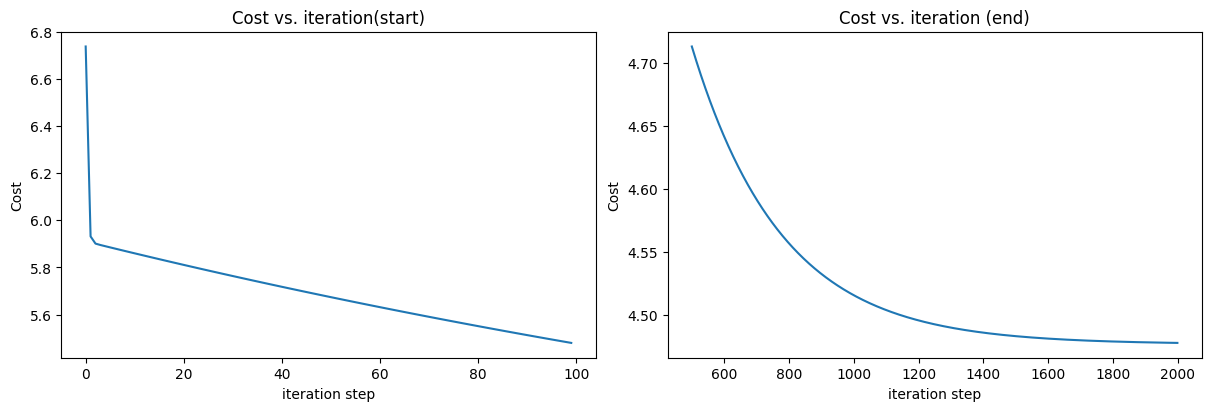

In [187]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100]) #前100次迭代
ax2.plot(500 + np.arange(len(J_hist[500:])), J_hist[500:]) # 后面的迭代
ax1.set_title("Cost vs. iteration(start)");  
ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  
ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  
ax2.set_xlabel('iteration step') 
plt.show()

- 绘制拟合后的曲线

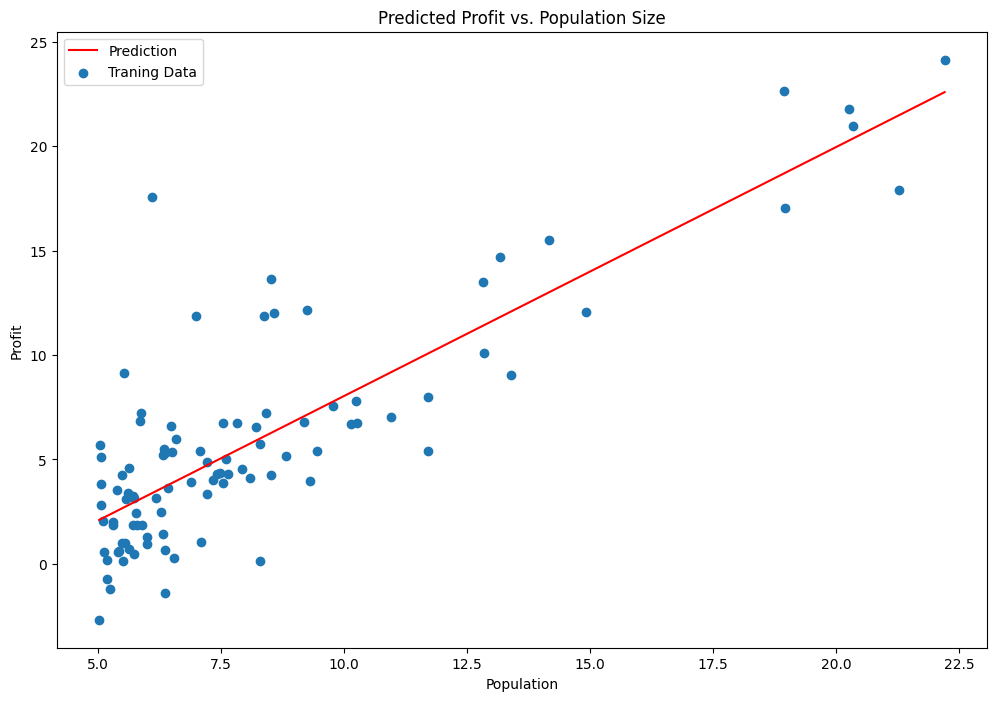

In [174]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f_wb = w_final * x + b_final

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f_wb, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()